<a href="https://colab.research.google.com/github/manjusingh0399/ai-credit-assesment/blob/main/model_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [7]:
df.dropna(inplace=True)

In [8]:
df = df[df['price'] > 0]

In [9]:
df = df[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'availability_365', 'price']]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
df = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'])

In [12]:
X = df.drop('price', axis=1)
y = df['price']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
predicted = model.predict(X_test)

In [15]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


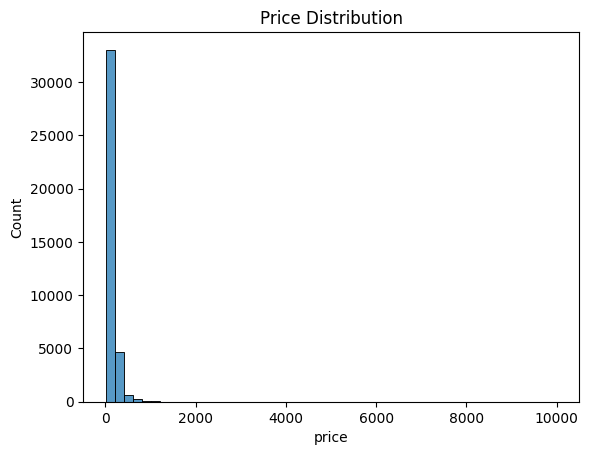

In [17]:
sns.histplot(df['price'], bins=50)
plt.title("Price Distribution")
plt.show()

In [20]:
df_raw = pd.read_csv('/content/AB_NYC_2019.csv')
df_raw.dropna(inplace=True)
df_raw = df_raw[df_raw['price'] > 0]

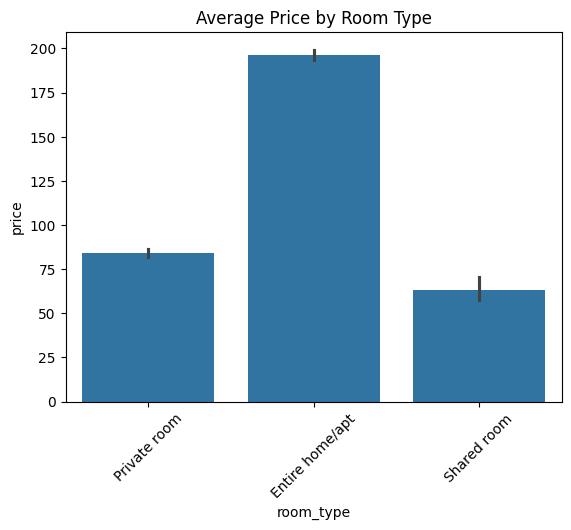

In [21]:
sns.barplot(data=df_raw, x='room_type', y='price')
plt.title("Average Price by Room Type")
plt.xticks(rotation=45)
plt.show()

In [22]:
df_raw = pd.read_csv('/content/AB_NYC_2019.csv')
df_raw.dropna(inplace=True)
df_raw = df_raw[df_raw['price'] > 0]

In [23]:
avg_price = df_raw.groupby('room_type')['price'].mean().reset_index()


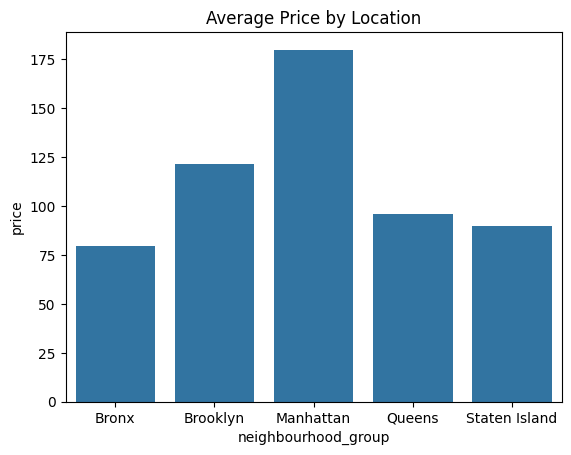

In [24]:
avg_price = df_raw.groupby('neighbourhood_group')['price'].mean().reset_index()
sns.barplot(data=avg_price, x='neighbourhood_group', y='price')
plt.title("Average Price by Location")
plt.show()

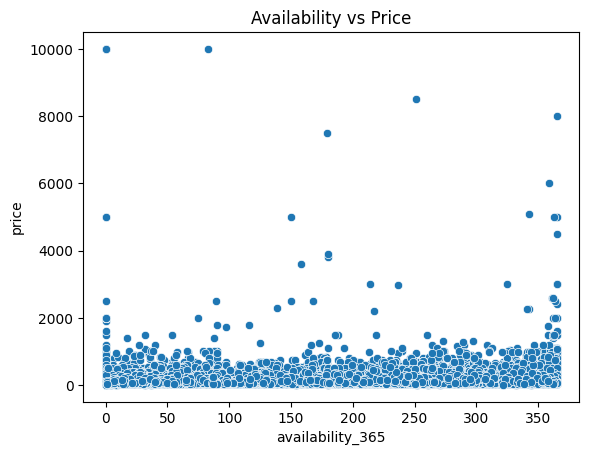

In [25]:
sns.scatterplot(data=df_raw, x='availability_365', y='price')
plt.title("Availability vs Price")
plt.show()

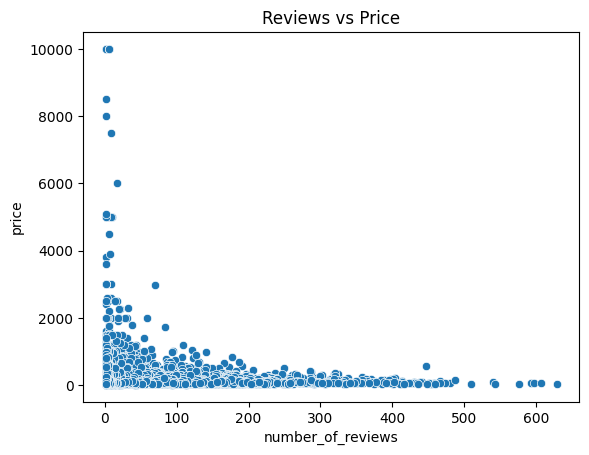

In [26]:
sns.scatterplot(data=df_raw, x='number_of_reviews', y='price')
plt.title("Reviews vs Price")
plt.show()

In [27]:
import pickle

In [28]:

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [29]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import pickle
import gzip

In [31]:
with gzip.open('model.pkl.gz', 'wb') as f:
    pickle.dump(model, f)